In [281]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [282]:
df = pd.read_csv('D:/dataset/Walmart.csv')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [283]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


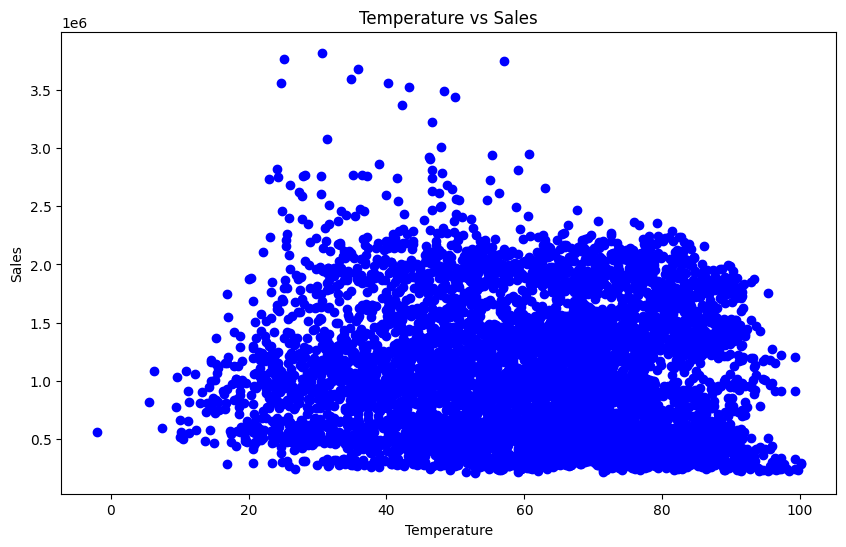

In [284]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Temperature'], df['Weekly_Sales'], c='blue')
plt.xlabel('Temperature')
plt.ylabel('Sales')
plt.title('Temperature vs Sales')
plt.show()

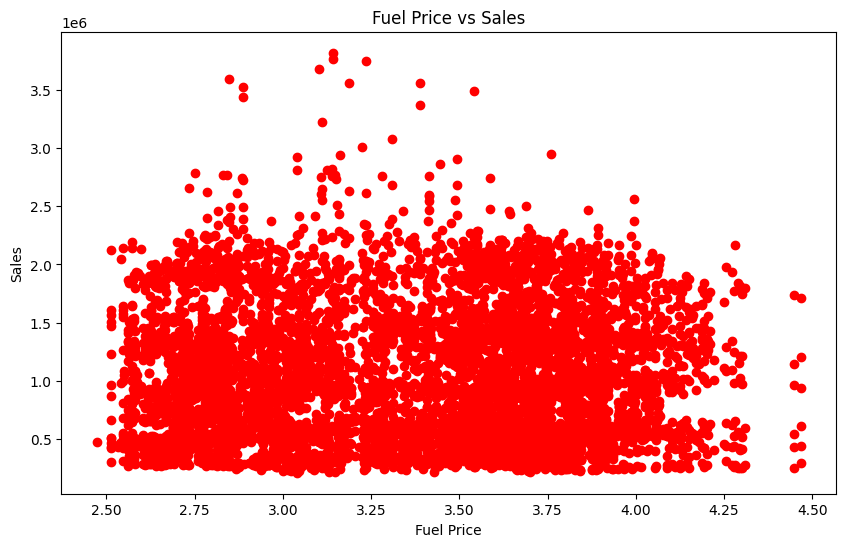

In [285]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Fuel_Price'], df['Weekly_Sales'], c='red')
plt.xlabel('Fuel Price')
plt.ylabel('Sales')
plt.title('Fuel Price vs Sales')
plt.show()

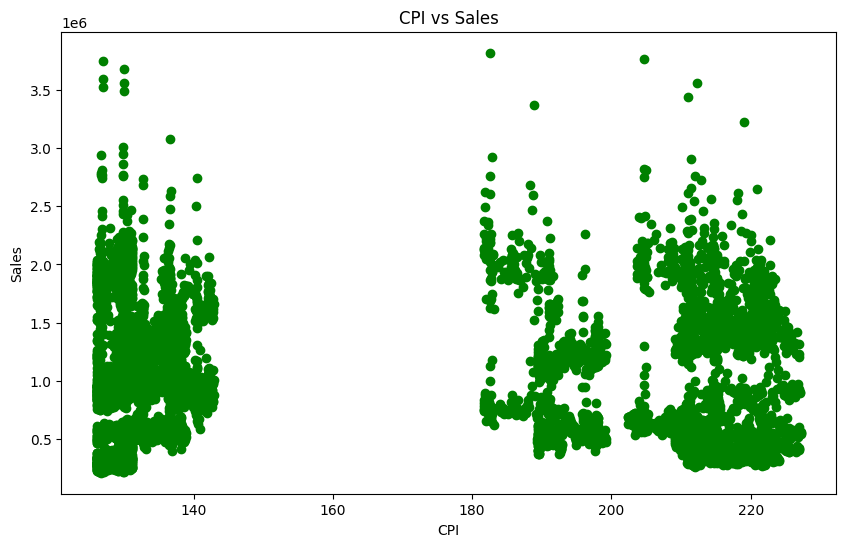

In [286]:
plt.figure(figsize=(10, 6))
plt.scatter(df['CPI'], df['Weekly_Sales'], c='green')
plt.xlabel('CPI')
plt.ylabel('Sales')
plt.title('CPI vs Sales')
plt.show()

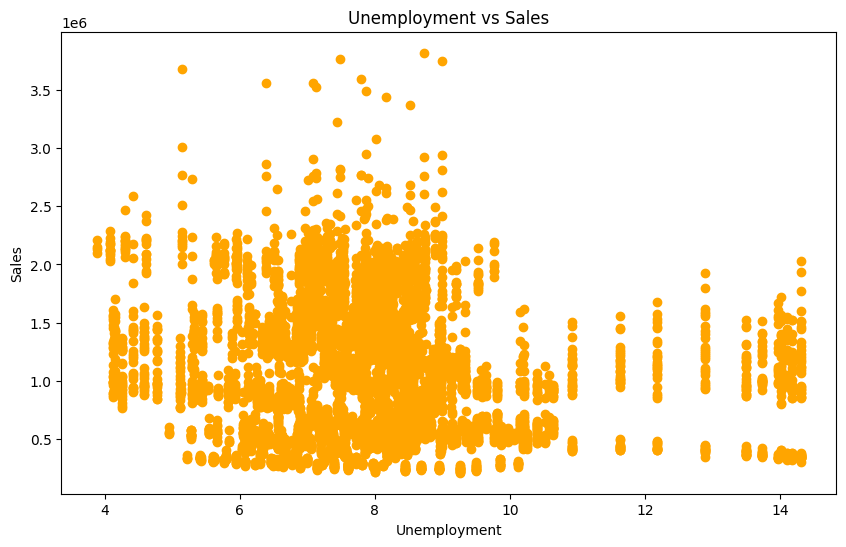

In [287]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Unemployment'], df['Weekly_Sales'], c='orange')
plt.xlabel('Unemployment')
plt.ylabel('Sales')
plt.title('Unemployment vs Sales')
plt.show()

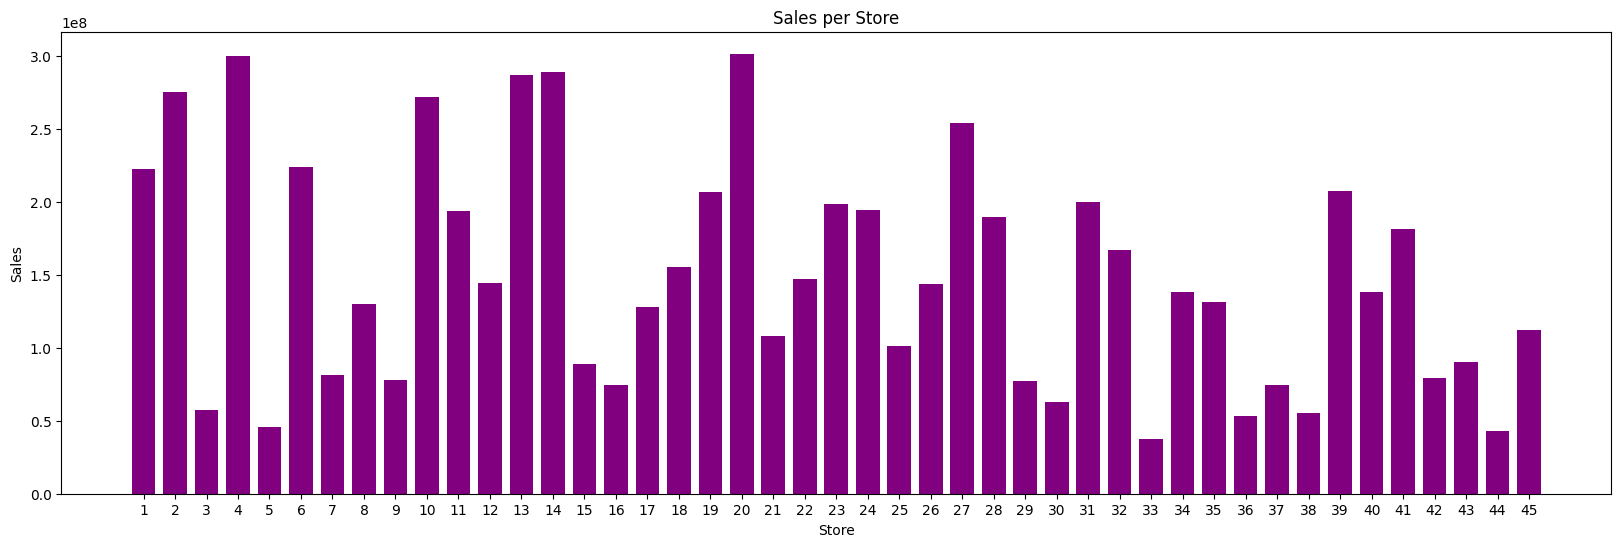

In [288]:
plt.figure(figsize=(20, 6))
stores = df['Store'].unique()
sales = [df[df['Store'] == store]['Weekly_Sales'].sum() for store in stores]

plt.bar(stores, sales, color='purple', alpha=1, align='center', width=0.75)
plt.xticks(stores)
plt.xlabel('Store')
plt.ylabel('Sales')
plt.title('Sales per Store')
plt.show()

<Axes: >

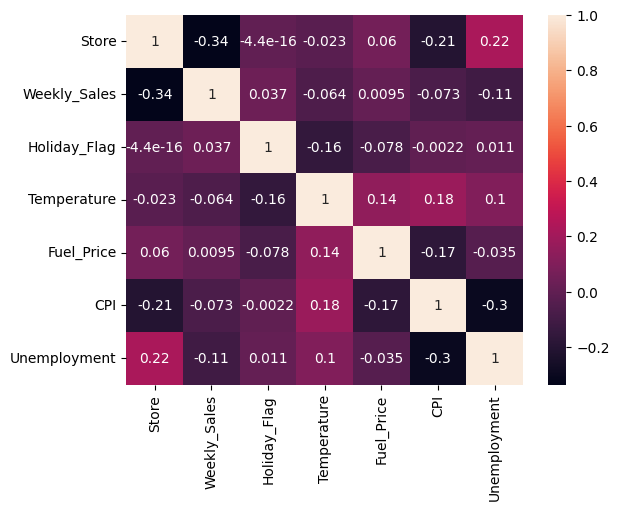

In [289]:
df_corr = df.drop(['Date'], axis=1)
sns.heatmap(df_corr.corr(), annot=True)

In [290]:
X = df[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Store']] 
y = df['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [291]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

Mean Squared Error: 263394090330.43552
Root Mean Squared Error: 513219.3393963594


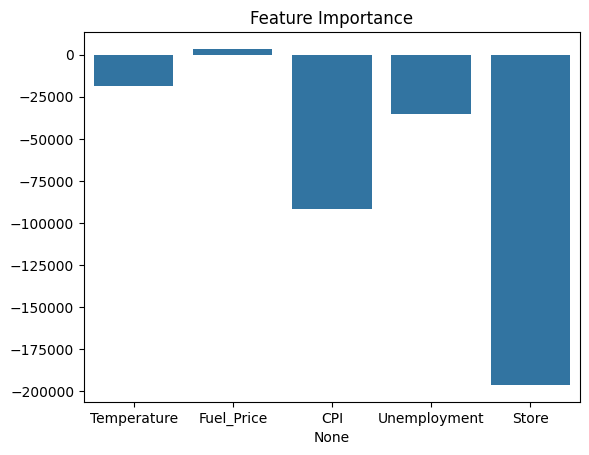

In [292]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_normal = LinearRegression()
model_normal.fit(X_train_scaled, y_train)

y_pred = model_normal.predict(X_test_scaled)

sns.barplot(x=X.columns, y=model_normal.coef_)
plt.title('Feature Importance')
plt.show()

In [293]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

Mean Squared Error: 263394090330.43555
Root Mean Squared Error: 513219.3393963594


In [294]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=0.5)
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=0.5)

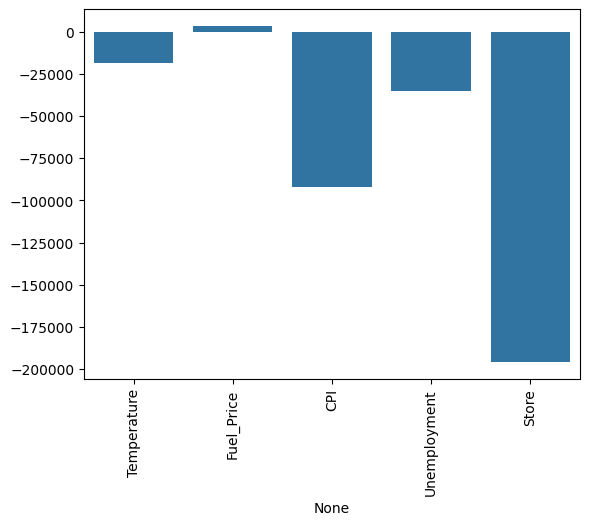

In [295]:
y_pred_train = ridge_model.predict(X_train_scaled)
y_pred = ridge_model.predict(X_test_scaled)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

sns.barplot(x = X_train_scaled_df.columns, y=ridge_model.coef_)
plt.xticks(rotation=90);

In [296]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

Mean Squared Error: 263394926793.4894
Root Mean Squared Error: 513220.1543134188


c:\Users\tay\anaconda3\envs\tf\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\tay\anaconda3\envs\tf\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\tay\anaconda3\envs\tf\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\tay\anaconda3\envs\tf\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\tay\anaconda3\envs\tf\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\tay\anaconda3\envs\tf\Lib\site-packages\sklearn\base.py:493: 

+----+--------+--------------------+
|    |  Day   |  Predicted_Sales   |
+----+--------+--------------------+
| 0  | Day 1  | 1297385.5416112053 |
| 1  | Day 2  | 1300658.8642284311 |
| 2  | Day 3  | 1298878.8094688887 |
| 3  | Day 4  | 1292472.600601918  |
| 4  | Day 5  | 1293008.7748842535 |
| 5  | Day 6  | 1281984.9722379942 |
| 6  | Day 7  | 1285967.8864058894 |
| 7  | Day 8  | 1289640.970479662  |
| 8  | Day 9  | 1284788.5516231307 |
| 9  | Day 10 | 1282046.8157976249 |
| 10 | Day 11 | 1282183.7352589148 |
| 11 | Day 12 | 1283679.0774801597 |
| 12 | Day 13 | 1281118.0655715931 |
| 13 | Day 14 | 1276514.7353231371 |
| 14 | Day 15 | 1274437.125636409  |
| 15 | Day 16 | 1271920.416252636  |
| 16 | Day 17 | 1266777.691826882  |
| 17 | Day 18 | 1265474.0232406047 |
| 18 | Day 19 | 1264806.1065741896 |
| 19 | Day 20 | 1260908.0215808435 |
| 20 | Day 21 | 1261065.9820893672 |
| 21 | Day 22 | 1265269.5279086682 |
| 22 | Day 23 | 1265765.2845127163 |
| 23 | Day 24 | 1262977.8781885665 |
|

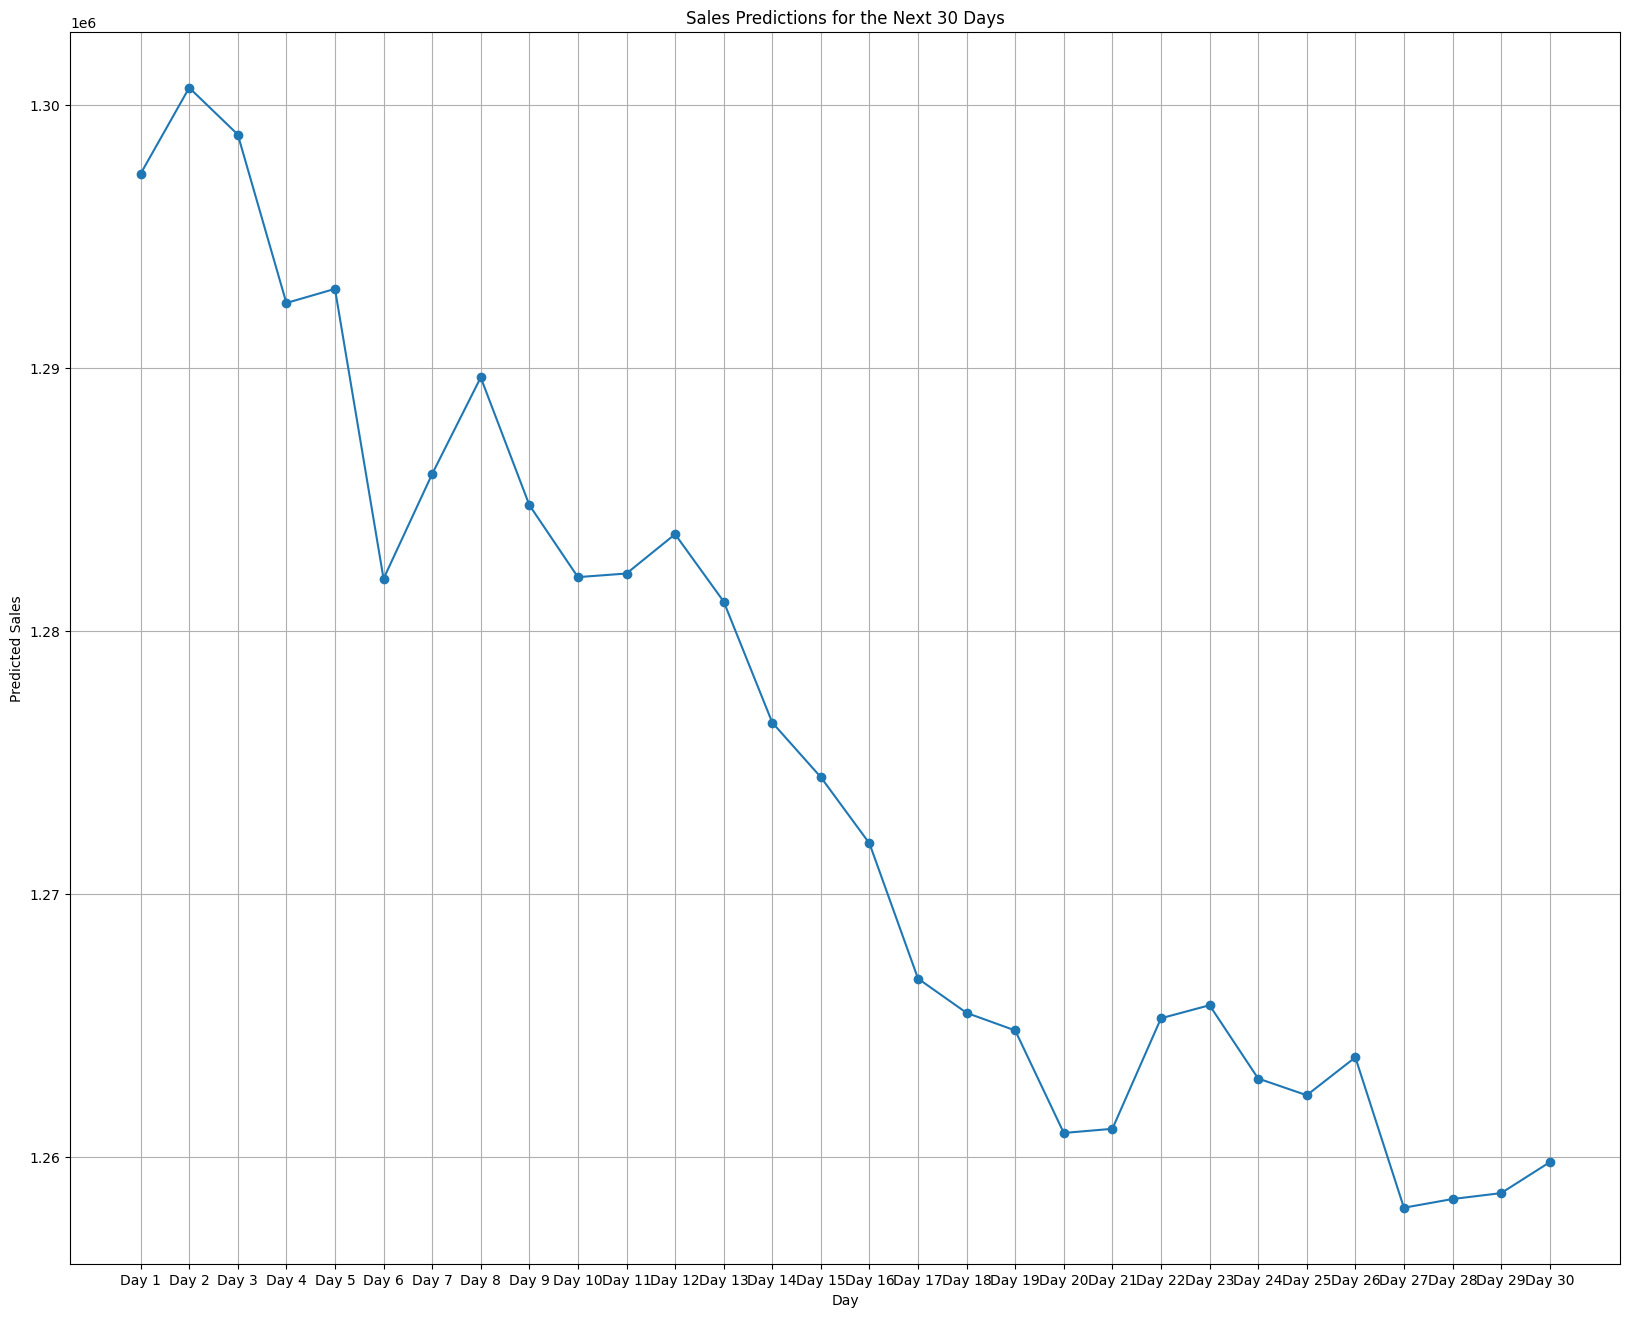

In [300]:
from tabulate import tabulate

X = df[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Store']] 
y = df['Weekly_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_normal = LinearRegression()
model_normal.fit(X_train_scaled, y_train)

y_pred = model_normal.predict(X_test_scaled)

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Date_ordinal'] = df['Date'].apply(lambda Date: Date.toordinal())

pred_list = []

for i in range(30):
    next_values = df.iloc[i][['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Store']]
    next_values_scaled = scaler.transform([next_values])  # Scale the features
    predicted_sales = model_normal.predict(next_values_scaled)  # Use the correct model
    pred_list.append(['Day ' + str(i+1), predicted_sales[0]])

pred_df = pd.DataFrame(pred_list, columns=['Day', 'Predicted_Sales'])
print(tabulate(pred_df, headers='keys', tablefmt='pretty'))

plt.figure(figsize=(20, 16))
plt.plot(pred_df['Day'], pred_df['Predicted_Sales'], marker='o')
plt.title('Sales Predictions for the Next 30 Days')
plt.xlabel('Day')
plt.ylabel('Predicted Sales')
plt.grid(True)
plt.show()